In [1]:
import sys
import os
from pathlib import Path
from glob import glob

In [2]:
sys.path.append('..')

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
from experiments.eval_features import eval_features

In [5]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_RESULTS = os.path.join(PATH_ROOT, 'results', 'exp643896')
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'tuning')
if not os.path.exists(PATH_OUTPUT):
    os.makedirs(PATH_OUTPUT)

print(PATH_RESULTS)

/home/lukec/workspace/baard_v4/results/exp643896


In [6]:

def get_auc_df(output_filename, detector_name, data_name, attack_name):
    path_files = glob(
        os.path.join(PATH_RESULTS, data_name, detector_name, attack_name,
                    f'{detector_name}-{data_name}-{attack_name}-*.pt'
                    ))
    print(path_files[0])

    eps_list = sorted([Path(f).stem.split('-')[-1] for f in path_files])
    eps_list = sorted([float(i) for i in eps_list[:-1]])
    # print(eps_list)

    files_adv = [f'{detector_name}-{data_name}-{attack_name}-{e}.pt' for e in eps_list]
    file_clean = f'{detector_name}-{data_name}-{attack_name}-clean.pt'

    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    df = pd.DataFrame()
    for file_adv in files_adv:
        _, df_auc_tpr = eval_features(path_input, os.path.join(PATH_RESULTS, 'roc'), file_clean, file_adv)
        df = pd.concat([df, df_auc_tpr], ignore_index=True)
    df['Epsilon'] = eps_list

    if output_filename:
        df.to_csv(os.path.join(PATH_OUTPUT, output_filename))
    return df


In [7]:
detector_list = [
    'ApplicabilityStage',
    'ReliabilityStage',
    'DecidabilityStage',
    'BAARD',
]

/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ApplicabilityStage/APGD-L2/ApplicabilityStage-MNIST-APGD-L2-0.5.pt
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ReliabilityStage/APGD-L2/ReliabilityStage-MNIST-APGD-L2-8.0.pt
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/DecidabilityStage/APGD-L2/DecidabilityStage-MNIST-APGD-L2-9.0.pt
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/BAARD/APGD-L2/BAARD-MNIST-APGD-L2-10.0.pt


<AxesSubplot: xlabel='Epsilon', ylabel='auc'>

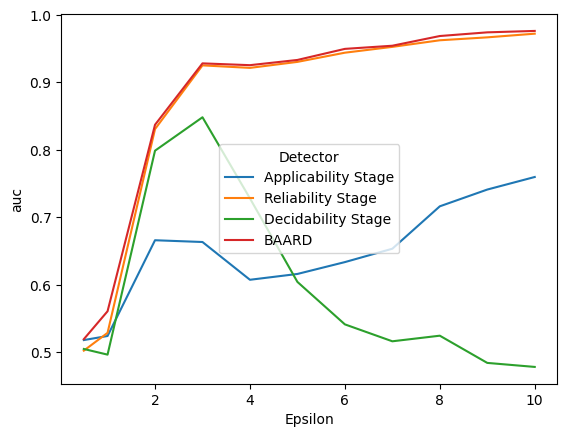

In [8]:
df_s1_mnist_l2 = get_auc_df('s1_mnist_apgd_l2.csv', detector_list[0], 'MNIST', 'APGD-L2')
df_s2_mnist_l2 = get_auc_df('s2_mnist_apgd_l2.csv', detector_list[1], 'MNIST', 'APGD-L2')
df_s3_mnist_l2 = get_auc_df('s3_mnist_apgd_l2.csv', detector_list[2], 'MNIST', 'APGD-L2')
df_all_mnist_l2 = get_auc_df('all_mnist_apgd_l2.csv', detector_list[3], 'MNIST', 'APGD-L2')

df_s1_mnist_l2['Detector'] = 'Applicability Stage'
df_s2_mnist_l2['Detector'] = 'Reliability Stage'
df_s3_mnist_l2['Detector'] = 'Decidability Stage'
df_all_mnist_l2['Detector'] = 'BAARD'

df1 = pd.concat(
    [df_s1_mnist_l2, df_s2_mnist_l2, df_s3_mnist_l2, df_all_mnist_l2], 
    ignore_index=True)
df1 = df1[['Epsilon', 'Detector', 'auc']]

sn.lineplot(data=df1, x='Epsilon', y='auc', hue='Detector')

/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ApplicabilityStage/APGD-Linf/ApplicabilityStage-MNIST-APGD-Linf-0.34.pt
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/ReliabilityStage/APGD-Linf/ReliabilityStage-MNIST-APGD-Linf-0.16.pt
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/DecidabilityStage/APGD-Linf/DecidabilityStage-MNIST-APGD-Linf-0.28.pt
/home/lukec/workspace/baard_v4/results/exp643896/MNIST/BAARD/APGD-Linf/BAARD-MNIST-APGD-Linf-0.41.pt


/home/lukec/workspace/baard_v4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: xlabel='Epsilon', ylabel='auc'>

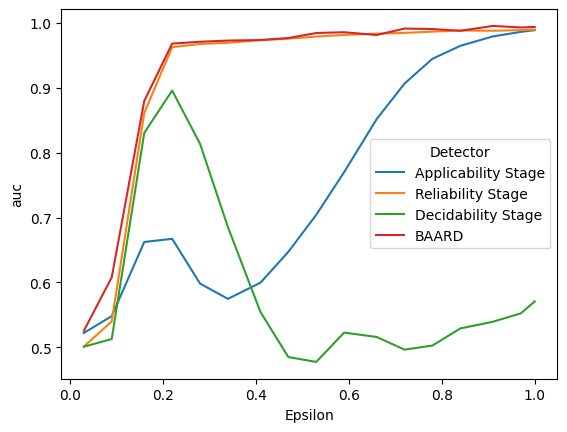

In [9]:
df_s1_mnist_linf = get_auc_df('s1_mnist_apgd_linf.csv', detector_list[0], 'MNIST', 'APGD-Linf')
df_s2_mnist_linf = get_auc_df('s2_mnist_apgd_linf.csv', detector_list[1], 'MNIST', 'APGD-Linf')
df_s3_mnist_linf = get_auc_df('s3_mnist_apgd_linf.csv', detector_list[2], 'MNIST', 'APGD-Linf')
df_all_mnist_linf = get_auc_df('all_mnist_apgd_linf.csv', detector_list[3], 'MNIST', 'APGD-Linf')

df_s1_mnist_linf['Detector'] = 'Applicability Stage'
df_s2_mnist_linf['Detector'] = 'Reliability Stage'
df_s3_mnist_linf['Detector'] = 'Decidability Stage'
df_all_mnist_linf['Detector'] = 'BAARD'

df2 = pd.concat(
    [df_s1_mnist_linf, df_s2_mnist_linf, df_s3_mnist_linf, df_all_mnist_linf], 
    ignore_index=True)
df2 = df2[['Epsilon', 'Detector', 'auc']]

sn.lineplot(data=df2, x='Epsilon', y='auc', hue='Detector')

/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ApplicabilityStage/APGD-L2/ApplicabilityStage-CIFAR10-APGD-L2-1.5.pt
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ReliabilityStage/APGD-L2/ReliabilityStage-CIFAR10-APGD-L2-0.9.pt
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/DecidabilityStage/APGD-L2/DecidabilityStage-CIFAR10-APGD-L2-2.7.pt
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/BAARD/APGD-L2/BAARD-CIFAR10-APGD-L2-0.1.pt


<AxesSubplot: xlabel='Epsilon', ylabel='auc'>

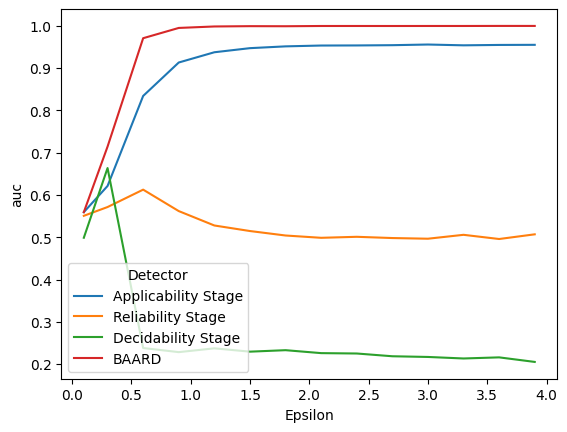

In [10]:
df_s1_cifar10_l2 = get_auc_df('s1_cifar10_apgd_l2.csv', detector_list[0], 'CIFAR10', 'APGD-L2')
df_s2_cifar10_l2 = get_auc_df('s2_cifar10_apgd_l2.csv', detector_list[1], 'CIFAR10', 'APGD-L2')
df_s3_cifar10_l2 = get_auc_df('s3_cifar10_apgd_l2.csv', detector_list[2], 'CIFAR10', 'APGD-L2')
df_all_cifar10_l2 = get_auc_df('all_cifar10_apgd_l2.csv', detector_list[3], 'CIFAR10', 'APGD-L2')

df_s1_cifar10_l2['Detector'] = 'Applicability Stage'
df_s2_cifar10_l2['Detector'] = 'Reliability Stage'
df_s3_cifar10_l2['Detector'] = 'Decidability Stage'
df_all_cifar10_l2['Detector'] = 'BAARD'

df3 = pd.concat(
    [df_s1_cifar10_l2, df_s2_cifar10_l2, df_s3_cifar10_l2, df_all_cifar10_l2], 
    ignore_index=True)
df3 = df3[['Epsilon', 'Detector', 'auc']]

sn.lineplot(data=df3, x='Epsilon', y='auc', hue='Detector')

/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ApplicabilityStage/APGD-Linf/ApplicabilityStage-CIFAR10-APGD-Linf-0.11.pt
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/ReliabilityStage/APGD-Linf/ReliabilityStage-CIFAR10-APGD-Linf-0.01.pt
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/DecidabilityStage/APGD-Linf/DecidabilityStage-CIFAR10-APGD-Linf-0.03.pt
/home/lukec/workspace/baard_v4/results/exp643896/CIFAR10/BAARD/APGD-Linf/BAARD-CIFAR10-APGD-Linf-0.06.pt


<AxesSubplot: xlabel='Epsilon', ylabel='auc'>

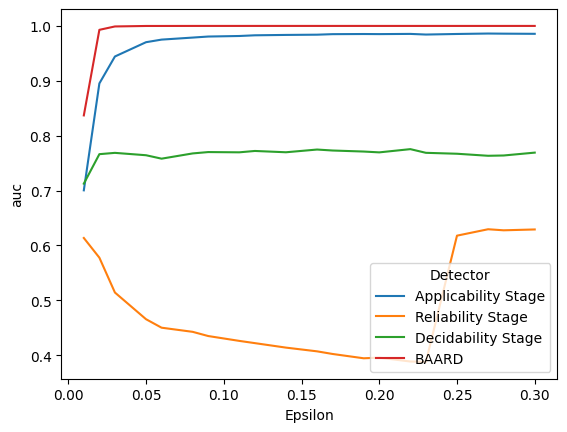

In [11]:
df_s1_cifar10_linf = get_auc_df('s1_cifar10_apgd_linf.csv', detector_list[0], 'CIFAR10', 'APGD-Linf')
df_s2_cifar10_linf = get_auc_df('s2_cifar10_apgd_linf.csv', detector_list[1], 'CIFAR10', 'APGD-Linf')
df_s3_cifar10_linf = get_auc_df('s3_cifar10_apgd_linf.csv', detector_list[2], 'CIFAR10', 'APGD-Linf')
df_all_cifar10_linf = get_auc_df('all_cifar10_apgd_linf.csv', detector_list[3], 'CIFAR10', 'APGD-Linf')

df_s1_cifar10_linf['Detector'] = 'Applicability Stage'
df_s2_cifar10_linf['Detector'] = 'Reliability Stage'
df_s3_cifar10_linf['Detector'] = 'Decidability Stage'
df_all_cifar10_linf['Detector'] = 'BAARD'

df4 = pd.concat(
    [df_s1_cifar10_linf, df_s2_cifar10_linf, df_s3_cifar10_linf, df_all_cifar10_linf], 
    ignore_index=True)
df4 = df4[['Epsilon', 'Detector', 'auc']]

sn.lineplot(data=df4, x='Epsilon', y='auc', hue='Detector')

In [12]:
import matplotlib.patches as patches

In [25]:
ibm_color_palette = [
    '#DC257F',
    '#6D88C4',
    '#6C63AC',
    '#F26322',
    '#FCB017',
    
]
sn.color_palette(ibm_color_palette)

[(0.8627450980392157, 0.1450980392156863, 0.4980392156862745),
 (0.42745098039215684, 0.5333333333333333, 0.7686274509803922),
 (0.4235294117647059, 0.38823529411764707, 0.6745098039215687),
 (0.9490196078431372, 0.38823529411764707, 0.13333333333333333),
 (0.9882352941176471, 0.6901960784313725, 0.09019607843137255)]

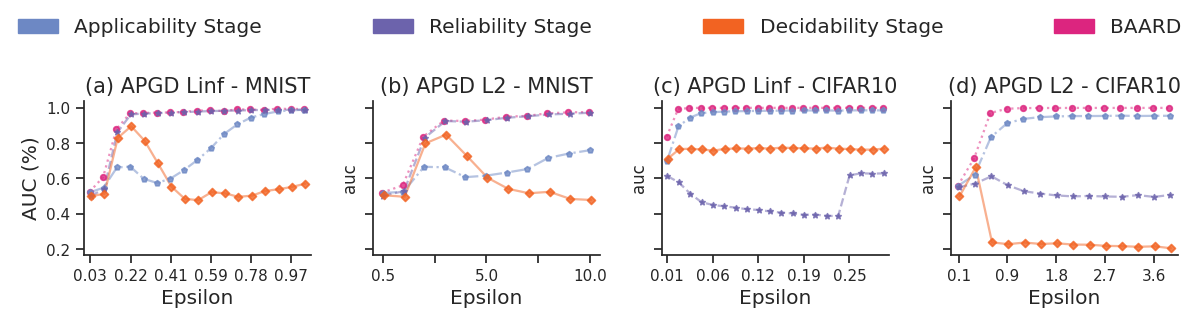

In [26]:

sn.set_theme(
    style='white',
    palette=ibm_color_palette,
)
sn.set_style('ticks')

FONTSIZE = 14.5

plt.rcParams['font.size'] = FONTSIZE
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(12, 2.75))

style_order = [
    'BAARD',
    'Applicability Stage',
    'Reliability Stage',
    'Decidability Stage',
]
linewidth = {
    'BAARD': 1.5,
    'Applicability Stage': 1,
    'Reliability Stage': 1,
    'Decidability Stage': 1,
}
markers = ['o', 'p', '*', 'D']
linestyles = [':', '-.', '--', '-']

# Sort with baard goes 1st
df1 = df1.sort_values('Detector', key=lambda s: s.apply(['BAARD', 'Applicability Stage', 'Reliability Stage', 'Decidability Stage'].index), ignore_index=True)
df2 = df2.sort_values('Detector', key=lambda s: s.apply(['BAARD', 'Applicability Stage', 'Reliability Stage', 'Decidability Stage'].index), ignore_index=True)
df3 = df3.sort_values('Detector', key=lambda s: s.apply(['BAARD', 'Applicability Stage', 'Reliability Stage', 'Decidability Stage'].index), ignore_index=True)
df4 = df4.sort_values('Detector', key=lambda s: s.apply(['BAARD', 'Applicability Stage', 'Reliability Stage', 'Decidability Stage'].index), ignore_index=True)

sn.pointplot(data=df2, x='Epsilon', y='auc', hue='Detector', ax=axs[0], markers=markers, scale=0.6, linestyles=linestyles, dodge=True)
sn.pointplot(data=df1, x='Epsilon', y='auc', hue='Detector', ax=axs[1], markers=markers, scale=0.6, linestyles=linestyles, dodge=True)
sn.pointplot(data=df4, x='Epsilon', y='auc', hue='Detector', ax=axs[2], markers=markers, scale=0.6, linestyles=linestyles, dodge=True)
sn.pointplot(data=df3, x='Epsilon', y='auc', hue='Detector', ax=axs[3], markers=markers, scale=0.6, linestyles=linestyles, dodge=True)
sn.despine(bottom=False, left=False)

titles = [
    '(a) APGD Linf - MNIST',
    '(b) APGD L2 - MNIST',
    '(c) APGD Linf - CIFAR10',
    '(d) APGD L2 - CIFAR10',
]

handles, labels = axs[-1].get_legend_handles_labels()
handles = [patches.Patch(color=c) for c in ibm_color_palette[:4]]
handles = handles[1:] + handles[:1]
labels = labels[1:] + labels[:1]
fig.legend(handles=handles, labels=labels, loc='lower left',
           bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=4, fontsize=FONTSIZE
           ).get_frame().set_linewidth(0)
axs[0].set_ylabel('AUC (%)', fontsize=FONTSIZE)
for i, title in enumerate(titles):
    axs[i].set_title(title, fontsize=FONTSIZE + 0.5)
    axs[i].get_legend().remove()
    axs[i].set_xlabel('Epsilon', fontsize=FONTSIZE)
    ax = axs[i]
    for dots in ax.collections:
        color = dots.get_facecolor()
        # dots.set_color(sn.set_hls_values(color, l=0.5))
        dots.set_alpha(.8)
        dots.set_zorder(2)
    for line in ax.lines:
        line.set_zorder(0)
        line.set_alpha(.5)
axs[0].set_xticks([0, 3, 6, 9, 12, 15])
axs[1].set_xticks(np.linspace(0, df1['Epsilon'].max(), num=5))
axs[2].set_xticks([0, 4, 8, 12, 16])
axs[3].set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
plt.savefig('ablation.pdf', dpi=300, bbox_inches='tight')
